# This notebook explains the Fisher's Z transformation

- https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
- https://en.wikipedia.org/wiki/Fisher_transformation

Assume you have $n$ points $(x_i, y_i)$ and you compute the Pearson correlation coefficient $r$ based on the observed points. We expect $r$ to be closed to the true Pearson correlation coefficient $\rho$ of the distribution, which coincides with the limit of the empirical $r$ as $n\to\infty$.
Let's ask ourselves, for a given sample size $n$, how confident are we of $\rho$ being close to $r$?

Equivalently, consider the sequence of $n$ points to be itself a random variable, whose distribution is the product of the distribution $\text{Law}(X,Y)$.
This makes the estimation $r$ a random variable varying in $[-1, 1]$, whose distribution $\text{Law}(r)$ depends on the distribution $\text{Law}(X,Y)$ and $n$, and should be concentrated around $\rho$.

The dependencies of $\text{Law}(r)$ can be dramatically simplified.
Above all, the dependency on $\text{Law}(X,Y)$ can be reduced to just a dependency on $\rho$ without any approximation.
The formula that captures the distribution of $r$ as a function of $\rho$ and $n$ is still very long, but can be handled with patience (search for $f(r)$ in Wikipedia's article about Pearson coefficient).

The objective of Fisher's Z transformation is to eliminate the dependency on $\rho$ as well by noting that the distribution of $\text{Law}(\text{atanh}(r))$ is approximately normal, and with approximately the same standard deviation for all values of $\rho$.

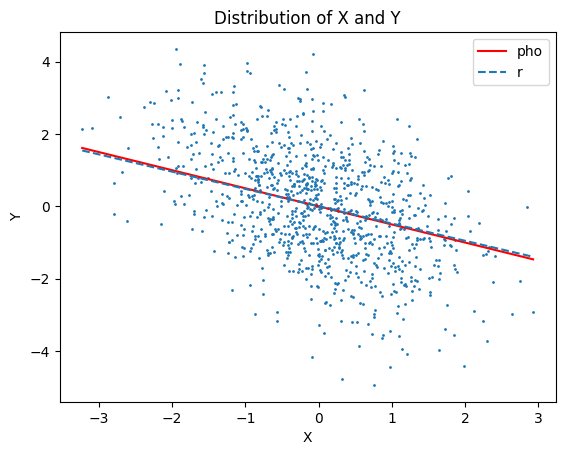

Truth: rho=-0.5  ;  empirical: r=-0.4774074865500524


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats


def simulate_XY(sigma, n):
    X, Y = np.random.multivariate_normal([0, 0], sigma, size=n).T
    return X, Y


def estimate_rho(X, Y):
    sigma = np.cov(X, Y)
    return sigma[0, 1] / (np.std(X) * np.std(Y))


stdX = 1
stdY = 1.5
rho = -0.5 # rho in [-1, 1]
sigma = np.array([[stdX**2, stdX * stdY * rho], [stdX * stdY * rho, stdY**2]])
X, Y = simulate_XY(sigma, 1000)
r = estimate_rho(X, Y)
_x = np.linspace(np.min(X), np.max(X))
_y_r = _x * r + np.mean(Y - X * r)
_y_rho = _x * rho
plt.title('Distribution of X and Y')
plt.scatter(X, Y, s=1)
plt.plot(_x, _y_rho, color='red', label='pho')
plt.plot(_x, _y_r, linestyle='--', label='r')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(f"Truth: rho={rho}  ;  empirical: r={r}")

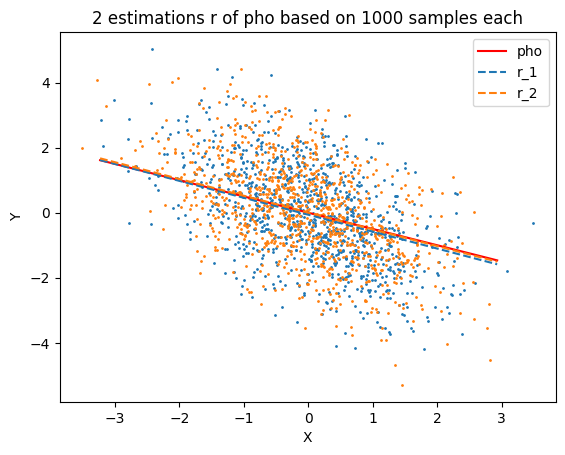

rho=-0.5  ;  r_1=-0.5203575039205286  ;  r_2=-0.5158266457704157


In [7]:
 # Twice
stdX = 1
stdY = 1.5
rho = -0.5 # rho in [-1, 1]
sigma = np.array([[stdX**2, stdX * stdY * rho], [stdX * stdY * rho, stdY**2]])
_x = np.linspace(np.min(X), np.max(X))
_y_rho = _x * rho
plt.title('2 estimations r of pho based on 1000 samples each')
plt.plot(_x, _y_rho, color='red', label='pho')
X, Y = simulate_XY(sigma, 1000)
r_1 = estimate_rho(X, Y)
_y_r = _x * r_1 + np.mean(Y - X * r_1)
plt.scatter(X, Y, s=1)
plt.plot(_x, _y_r, linestyle='--', label='r_1')
X, Y = simulate_XY(sigma, 1000)
r_2 = estimate_rho(X, Y)
_y_r = _x * r_2 + np.mean(Y - X * r_2)
plt.scatter(X, Y, s=1)
plt.plot(_x, _y_r, linestyle='--', label='r_2')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(f"rho={rho}  ;  r_1={r_1}  ;  r_2={r_2}")

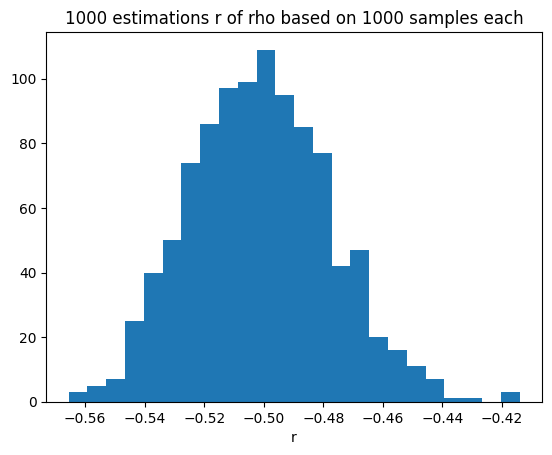

In [91]:
r_arr = []
n = 1000
for _ in range(1000):
    X, Y = simulate_XY(sigma, n)
    est = estimate_rho(X, Y)
    r_arr.append(est)

plt.title(f'1000 estimations r of rho based on 1000 samples each')
plt.hist(r_arr, bins="auto")
plt.xlabel('r')
plt.show()

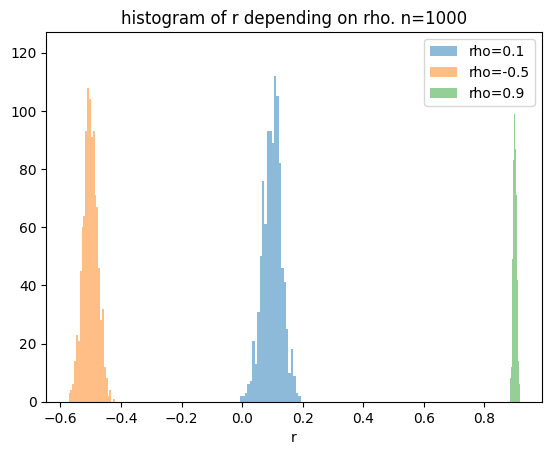

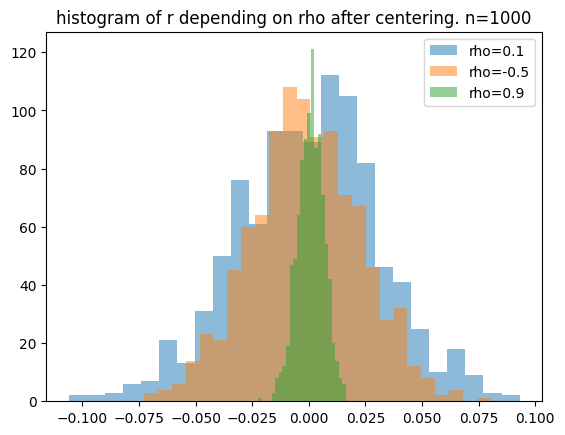

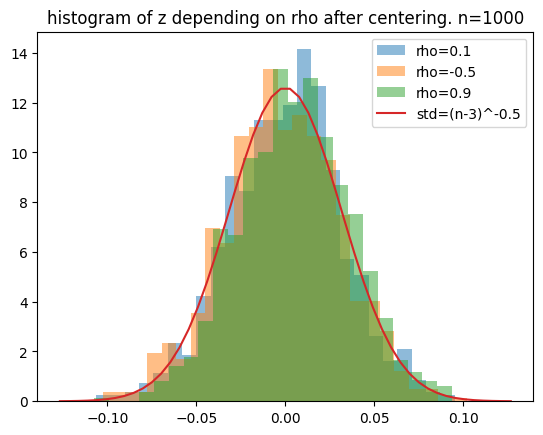

In [99]:
n = 1000
meta_n = 1000
stdX = 1
stdY = 1.5
estimations = []
for rho in [0.1, -0.5, 0.9]:
    sigma = np.array([[stdX**2, stdX * stdY * rho], [stdX * stdY * rho, stdY**2]])
    r_arr = np.zeros(meta_n)
    for i in range(meta_n):
        X, Y = simulate_XY(sigma, n)
        r_arr[i] = estimate_rho(X, Y)
    estimations.append((rho, r_arr))

plt.title(f"histogram of r depending on rho. n={n}")
for rho, r in estimations:
    plt.hist(r, bins="auto", alpha=0.5, label=f"rho={rho}")
plt.legend()
plt.xlabel("r")
plt.show()

plt.title(f"histogram of r depending on rho after centering. n={n}")
for rho, r in estimations:
    plt.hist(r - rho, bins="auto", alpha=0.5, label=f"rho={rho}")
plt.legend()
plt.show()


plt.title(f"histogram of z depending on rho after centering. n={n}")
for rho, r in estimations:
    plt.hist(
        np.arctanh(r) - np.arctanh(rho),
        bins="auto",
        alpha=0.5,
        label=f"rho={rho}",
        density=True,
    )
_sigma = 1 / (n - 3) ** 0.5
_x = np.linspace(-4 * _sigma, 4 * _sigma)
_pdf = scipy.stats.norm(0, _sigma).pdf(_x) # type:ignore
plt.plot(_x, _pdf, label="std=(n-3)^-0.5")
plt.legend()
plt.show()
